In [21]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [22]:
# Step 2: Load Dataset

data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data.columns = ['Passengers']

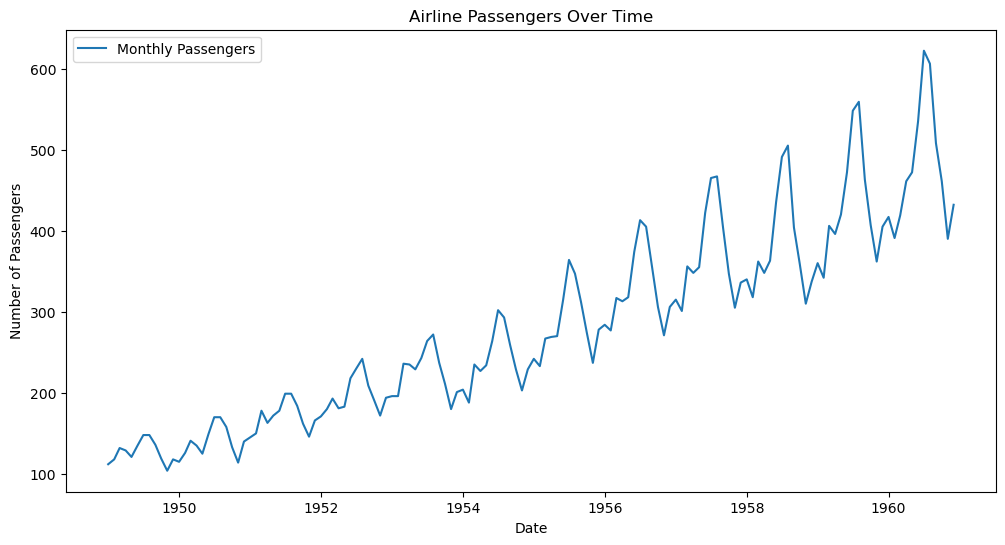

In [23]:
# Step 3: Visualize Data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Monthly Passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [24]:
# Step 4: Check Stationarity
result = adfuller(data['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411


In [25]:
# Step 5: Differencing (if necessary)
data_diff = data['Passengers'].diff().dropna()

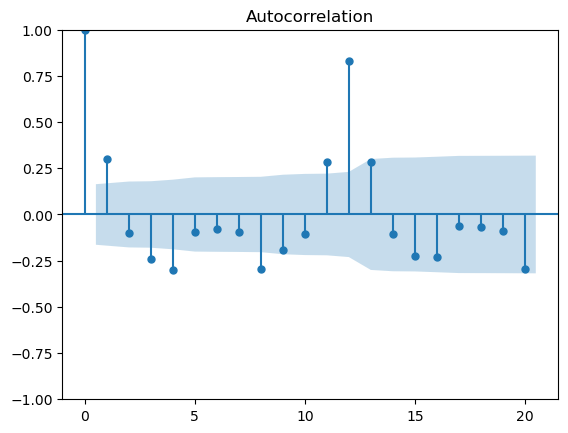

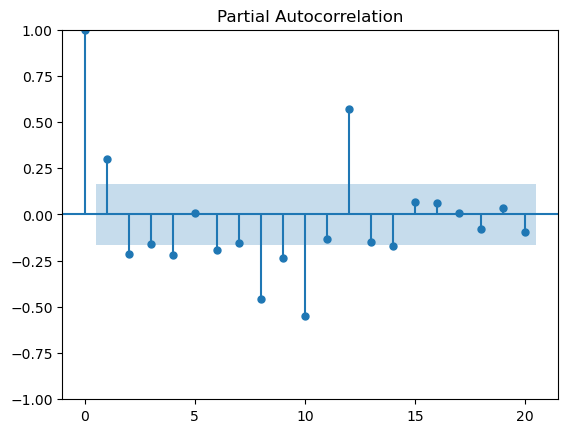

In [26]:
# Step 6: Determine ARIMA Parameters (p, d, q)
sm.graphics.tsa.plot_acf(data_diff, lags=20)
sm.graphics.tsa.plot_pacf(data_diff, lags=20)
plt.show()

In [27]:
# Step 7: Fit ARIMA Model (let's assume p=1, d=1, q=1 for this example)
model = ARIMA(data['Passengers'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
# Step 8: Make Predictions
forecast = model_fit.forecast(steps=12)

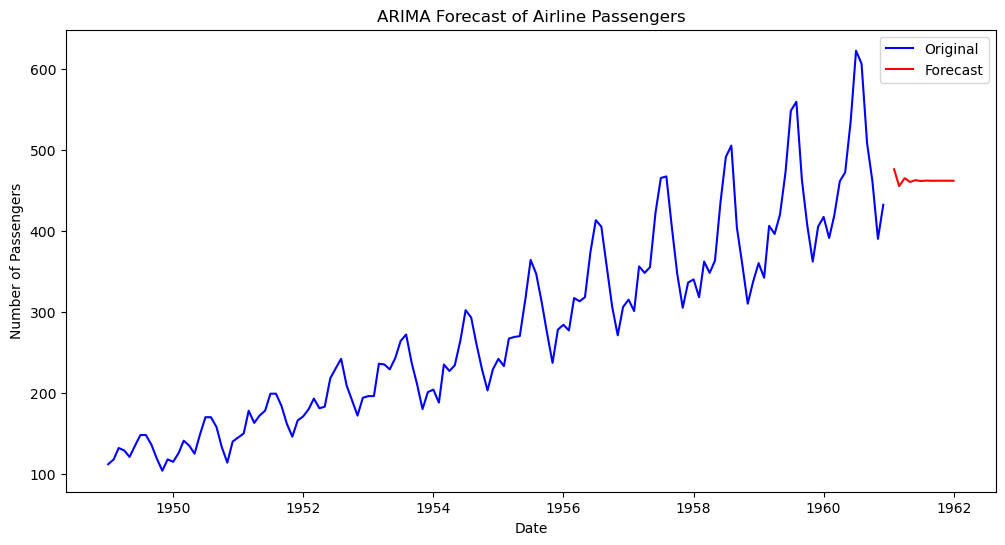

In [29]:
# Step 9: Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original', color='blue')
plt.plot(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()